<a href="https://colab.research.google.com/github/janael-pinheiro/time_series/blob/master/stock_prediction_holt_winters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 -q install investpy

     |████████████████████████████████| 4.4MB 2.8MB/s 
     |████████████████████████████████| 245kB 51.2MB/s 
     |████████████████████████████████| 5.5MB 44.9MB/s 
     |████████████████████████████████| 512kB 46.8MB/s 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import investpy
from datetime import date
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
sns.set_style("whitegrid", {"grid.style":"--"})

In [4]:
years = 10
stock_name = "AAPL"
country = "United States"

In [5]:
initial_date = "{0}/{1}/{2}".format(date.today().day, date.today().month, date.today().year-years)

In [6]:
final_date = date.today().strftime("%d/%m/%Y")

In [7]:
prices = investpy.get_stock_historical_data(stock=stock_name, from_date=initial_date, to_date=final_date, country=country)

In [8]:
prices

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2010-10-18,11.37,11.39,11.22,11.36,1104458624,USD
2010-10-19,10.84,11.21,10.71,11.05,1232760576,USD
2010-10-20,11.04,11.22,10.96,11.09,721624832,USD
2010-10-21,11.16,11.24,10.96,11.05,551457856,USD
2010-10-22,11.04,11.07,10.94,10.98,372775808,USD
...,...,...,...,...,...,...
2020-10-12,120.02,125.16,119.36,124.40,240226768,USD
2020-10-13,125.32,125.32,119.89,121.10,262330448,USD
2020-10-14,120.92,122.99,119.63,121.19,151062304,USD


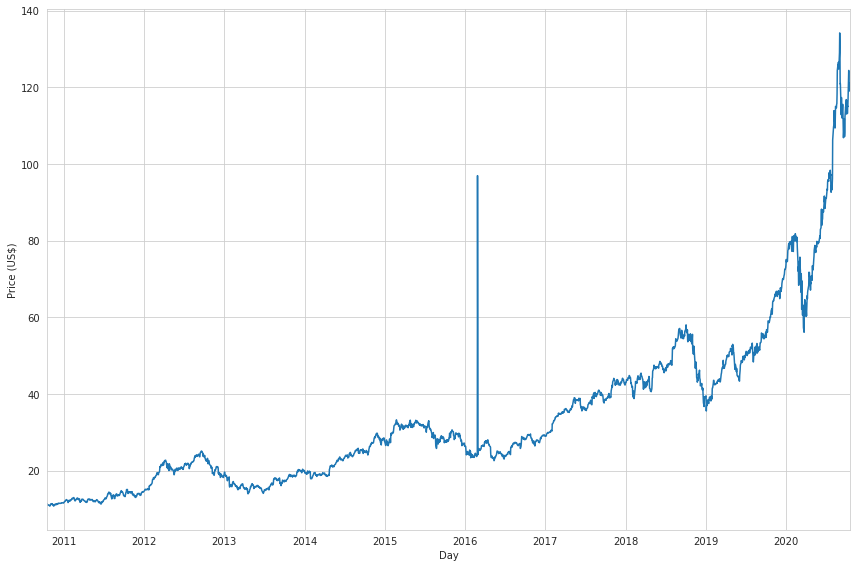

In [10]:
plt.figure(figsize=(12,8))
sns.lineplot(data=prices["Close"])
plt.xlabel("Day")
plt.ylabel("Price (US$)")
plt.xlim(pd.Timestamp(prices.index.min()), pd.Timestamp(prices.index.max()))
plt.grid(True)
plt.tight_layout()

In [ ]:
prices["Close"].index

DatetimeIndex(['2010-10-11', '2010-10-13', '2010-10-14', '2010-10-15',
               '2010-10-18', '2010-10-19', '2010-10-20', '2010-10-21',
               '2010-10-22', '2010-10-25',
               ...
               '2020-09-28', '2020-09-29', '2020-09-30', '2020-10-01',
               '2020-10-02', '2020-10-05', '2020-10-06', '2020-10-07',
               '2020-10-08', '2020-10-09'],
              dtype='datetime64[ns]', name='Date', length=2475, freq=None)

In [ ]:
prices.index

DatetimeIndex(['2010-10-11', '2010-10-13', '2010-10-14', '2010-10-15',
               '2010-10-18', '2010-10-19', '2010-10-20', '2010-10-21',
               '2010-10-22', '2010-10-25',
               ...
               '2020-09-28', '2020-09-29', '2020-09-30', '2020-10-01',
               '2020-10-02', '2020-10-05', '2020-10-06', '2020-10-07',
               '2020-10-08', '2020-10-09'],
              dtype='datetime64[ns]', name='Date', length=2475, freq=None)

In [11]:
close_prices = prices["Close"]

Decomposição

In [12]:
decomposed_series = seasonal_decompose(close_prices, model="mul", freq=240)

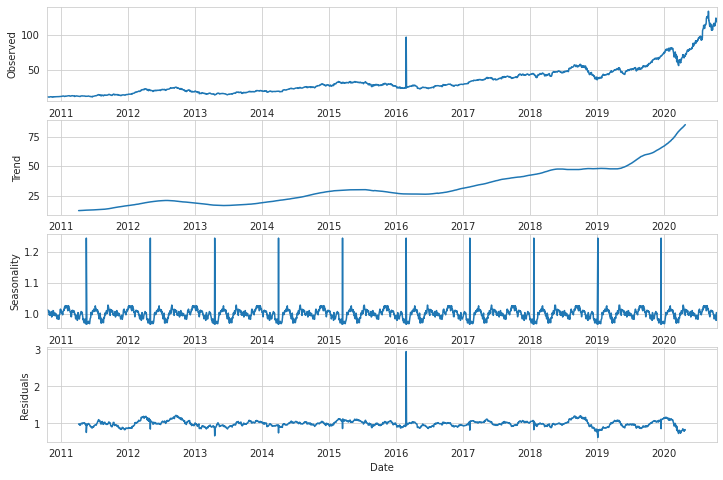

In [14]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12,8))
sns.lineplot(data=decomposed_series.observed, ax=ax1)
sns.lineplot(data=decomposed_series.trend, ax=ax2)
sns.lineplot(data=decomposed_series.seasonal, ax=ax3)
sns.lineplot(data=decomposed_series.resid, ax=ax4)
for ax, ylabel in zip([ax1, ax2, ax3, ax4], ["Observed", "Trend", "Seasonality", "Residuals"]):
  ax.set_xlim(pd.Timestamp(close_prices.index.min()), pd.Timestamp(close_prices.index.max()))
  ax.set_ylabel(ylabel)

#Predictions with Holt-Winters.

In [15]:
def walkForward(train_data, test_data, trend, seasonality, periods):
    predictions = []
    train = train_data.values
    test = test_data.values
    
    for t in range(len(test)):
        trainedModel = ExponentialSmoothing(train, trend=trend, seasonal=seasonality, seasonal_periods=periods).fit()
        y_pred = trainedModel.predict()
        predictions.append(y_pred[0])
        train = np.append(train, test[t])
    return predictions

In [25]:
train_data = close_prices[:"2020-06-30"]
test_data = close_prices["2020-07-01":]

In [26]:
train_data

Date
2010-10-18    11.36
2010-10-19    11.05
2010-10-20    11.09
2010-10-21    11.05
2010-10-22    10.98
              ...  
2020-06-24    90.02
2020-06-25    91.21
2020-06-26    88.41
2020-06-29    90.44
2020-06-30    91.20
Name: Close, Length: 2443, dtype: float64

In [27]:
test_data

Date
2020-07-01     91.03
2020-07-02     91.03
2020-07-06     93.46
2020-07-07     93.17
2020-07-08     95.34
               ...  
2020-10-12    124.40
2020-10-13    121.10
2020-10-14    121.19
2020-10-15    120.71
2020-10-16    119.02
Name: Close, Length: 76, dtype: float64

In [42]:
predictions = walkForward(train_data=train_data, test_data=test_data, trend="add", seasonality="add", periods=240)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  Conver

In [43]:
predictions

[90.61690027548448,
 90.97574914982889,
 90.90254452455052,
 91.99987639415713,
 92.65804720665486,
 93.88116608950428,
 94.86614829525081,
 95.43093005073052,
 95.76462961490421,
 96.07502102918762,
 96.80627667569854,
 96.51269476618074,
 96.65523504059819,
 97.27980100245863,
 97.47163481056424,
 97.54567409237954,
 95.84199000383514,
 95.08615494192557,
 95.16011319193129,
 94.57429328630558,
 95.03055230231553,
 95.52107865919687,
 99.4498929181553,
 103.20892199526814,
 105.96051569887842,
 107.55348139451294,
 110.57207007054058,
 110.74535610169205,
 112.0846076608261,
 111.22444008082482,
 112.11161196398845,
 113.46858725370114,
 114.54349553690736,
 114.93336196387699,
 115.31503807808376,
 115.74449246631848,
 117.22140623353866,
 120.59231908803478,
 123.5566033401183,
 124.53805492726983,
 126.01902325167559,
 126.25782666878972,
 126.33473154641288,
 127.80993385699226,
 130.75268474985364,
 131.7777666185754,
 128.32671534672397,
 125.57927500950495,
 120.47105618902026

In [44]:
df_predictions = pd.DataFrame()
df_predictions["DATE"] = test_data.index
df_predictions["values"] = predictions
df_predictions

,DATE,values
0,2020-07-01,90.616900
1,2020-07-02,90.975749
2,2020-07-06,90.902545
3,2020-07-07,91.999876
4,2020-07-08,92.658047
...,...,...
71,2020-10-12,115.803332
72,2020-10-13,119.329603
73,2020-10-14,120.552361
74,2020-10-15,121.473618


(737607.0, 737707.0)

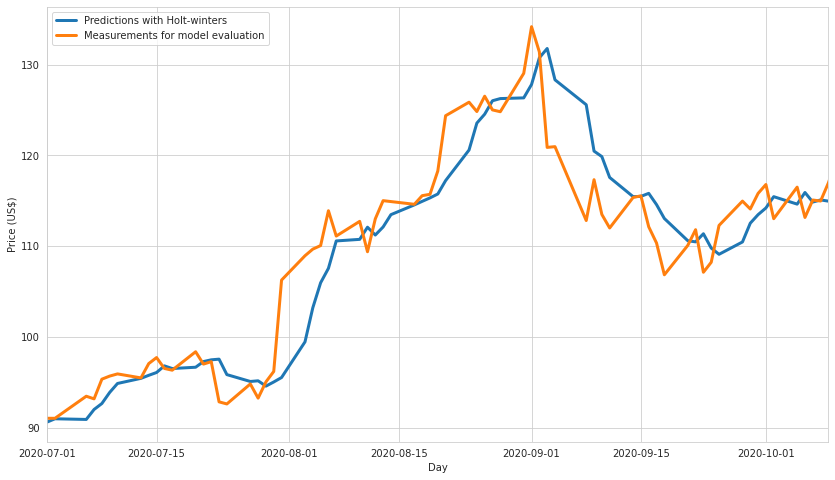

In [45]:
plt.figure(figsize=(14,8))
plt.plot(df_predictions.set_index("DATE"), label="Predictions with Holt-winters", lw=3)
plt.plot(test_data, label="Measurements for model evaluation", lw=3)
plt.xlabel("Day")
plt.ylabel("Price (US$)")
plt.legend(loc="upper left")
plt.xlim(pd.Timestamp("2020-07-01"), pd.Timestamp("2020-10-09"))
#plt.ylim(test_data.min(), test_data.max())

#RMSE and MAE

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [46]:
print("MAE: {0}.".format(mean_absolute_error(test_data.values, predictions)))
print("RMSE: {0}.".format(np.sqrt(mean_squared_error(test_data.values, predictions))))

MAE: 2.796386725679423.
RMSE: 3.96603590280178.
